In [1]:
from PIL import Image, ImageDraw, ImageFont
import json
from IPython.display import display

# Load your updated COCO JSON dataset
updated_coco_json_path = "/Users/caraappel/Documents/CV4E/oregon_critters/json/adj_xy/dataset_300_adjxy_train.json" 
with open(updated_coco_json_path, 'r') as json_file:
    coco_data = json.load(json_file)

# Specify the image directory
image_directory = "/Users/caraappel/Documents/CV4E/"  # Replace with the actual path


In [2]:
# Function to visualize annotations for a specific image
def visualize_annotations_for_image(image_info, annotations, categories):
    image_path = image_directory + "/" + image_info['file_name']
    image = Image.open(image_path)
    draw = ImageDraw.Draw(image)
    #font = ImageFont.load_default()  

    # Customize font and fill color for the label text
    label_font = ImageFont.load_default()  
    label_fill = 'red'  
    
    for ann in annotations:
        bbox = ann['bbox']
        x1, y1, width, height = bbox
        x2, y2 = x1 + width, y1 + height
        draw.rectangle([x1, y1, x2, y2], outline='red', width=5)
        
        category_id = ann['category_id']
        category_name = next((cat['name'] for cat in categories if cat['id'] == category_id), "Unknown")
        label_text = f"{category_name}"
        
        # Get the bounding box of the label text
        label_bbox = draw.textbbox((x1, y1 - 100), label_text, font=label_font)
        draw.rectangle(label_bbox, fill='red')
       
        # Draw the label text
        draw.text((label_bbox[0], label_bbox[1]), label_text, fill=label_fill, font=label_font)

    display(image)  # Display the image directly in the notebook


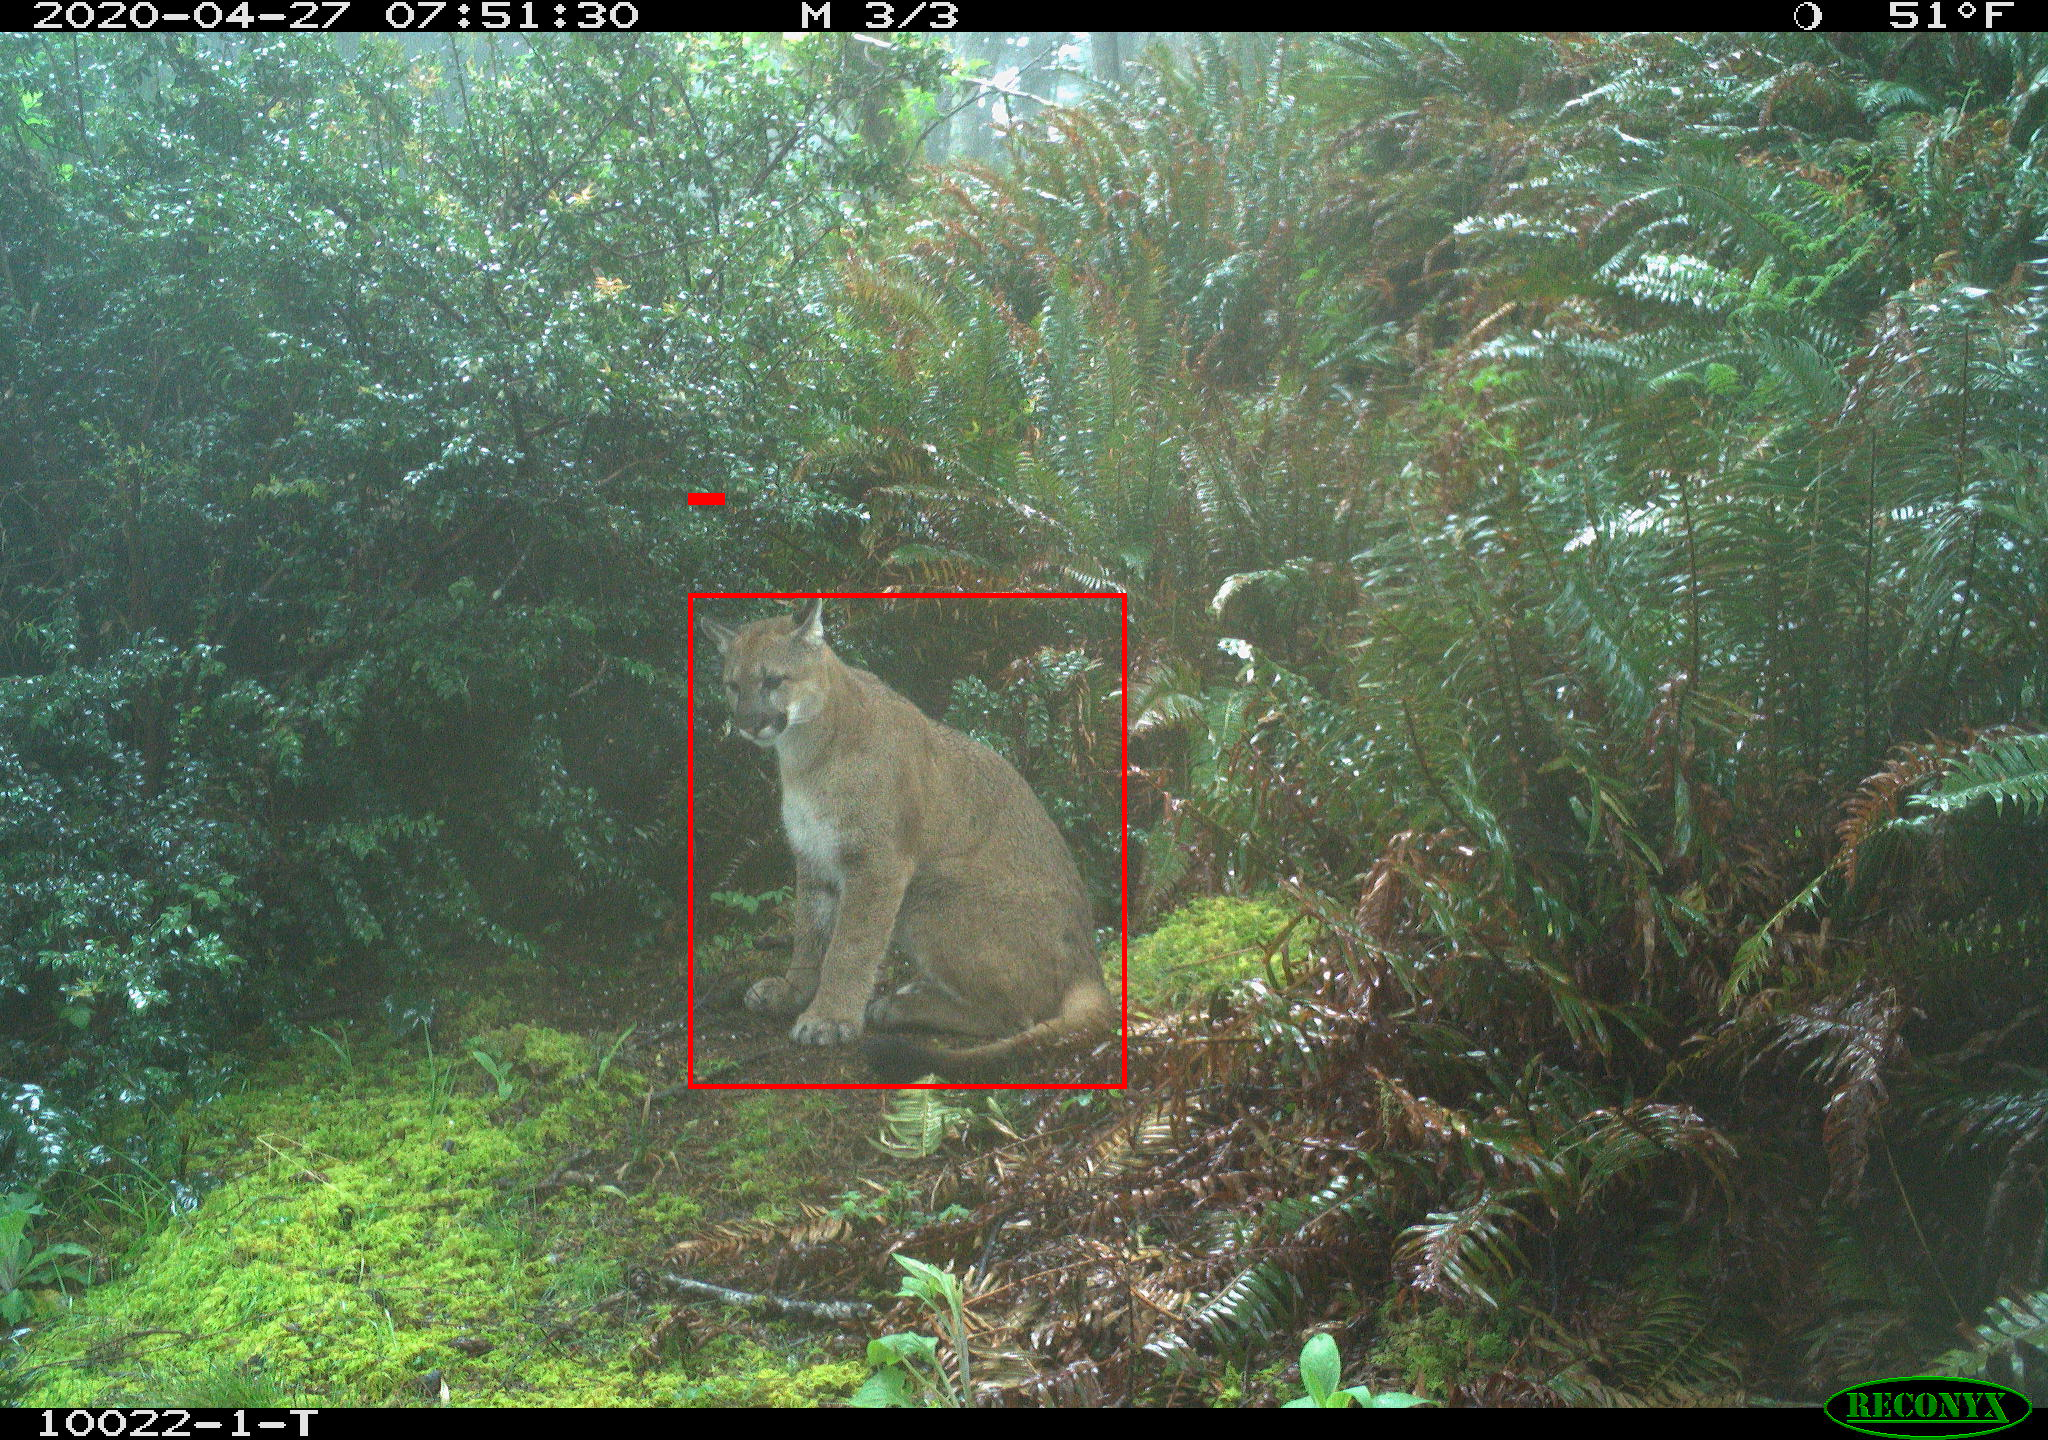

In [6]:
# Specify the image ID you want to visualize
image_id_to_visualize = 800  # Replace with the desired image ID

# Find the image information, annotations, and categories for the specified image ID
image_info = next((img for img in coco_data['images'] if img['id'] == image_id_to_visualize), None)
annotations = [ann for ann in coco_data['annotations'] if ann['image_id'] == image_id_to_visualize]
categories = coco_data['categories']

# Visualize the bounding boxes and labels for the specified image
if image_info and annotations:
    visualize_annotations_for_image(image_info, annotations, categories)
else:
    print("Image information or annotations not found.")